<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 19 columns):
 _conds         100918 non-null object
 _dewptm        100369 non-null float64
 _fog           100990 non-null int64
 _hail          100990 non-null int64
 _heatindexm    29155 non-null float64
 _hum           100233 non-null float64
 _precipm       0 non-null float64
 _pressurem     100758 non-null float64
 _rain          100990 non-null int64
 _snow          100990 non-null int64
 _tempm         100317 non-null float64
 _thunder       100990 non-null int64
 _tornado       100990 non-null int64
 _vism          96562 non-null float64
 _wdird         86235 non-null float64
 _wdire         86235 non-null object
 _wgustm        1072 non-null float64
 _windchillm    579 non-null float64
 _wspdm         98632 non-null float64
dtypes: float64(11), int64(6), object(2)
memory usage: 15.4+ MB
None
dataset shape (rows, columns) - (100990, 3)


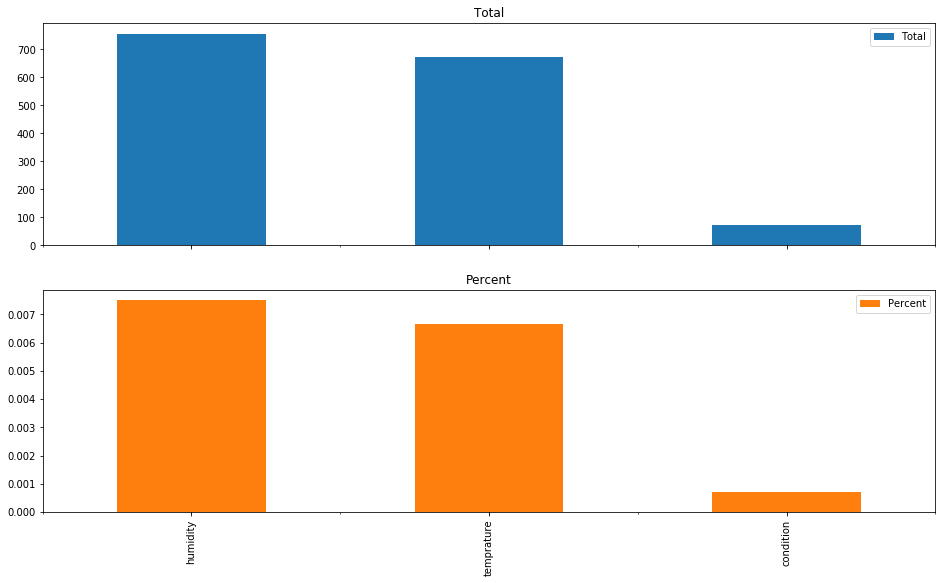

In [2]:
import numpy as np # linear algebra
import pandas as pd 

#loading the dataset
weather_df = pd.read_csv('testset.csv', parse_dates=['datetime_utc'], index_col='datetime_utc')

#Printing the attributes
print(weather_df.info(verbose='True'))


weather_df = weather_df.loc[:,[' _conds', ' _hum', ' _tempm']]
weather_df = weather_df.rename(index=str, columns={' _conds': 'condition', ' _hum': 'humidity', ' _pressurem': 'pressure', ' _tempm': 'temprature'})
print(f'dataset shape (rows, columns) - {weather_df.shape}')
weather_df.index = pd.to_datetime(weather_df.index)

def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]
    
    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(weather_df)

In [3]:
# will fill with previous valid value
weather_df.ffill(inplace=True)
weather_df[weather_df.isnull()].count()

condition     0
humidity      0
temprature    0
dtype: int64